In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at C:\Users\Dell\AppData\Local\Temp\matplotlib-1yfcy8l9 because the default path (C:\Users\Dell\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = pd.read_csv('data/Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
for col in data.columns:
    print(col, (data[col].nunique() / len(data)) * 100)

RowNumber 100.0
CustomerId 100.0
Surname 29.32
CreditScore 4.6
Geography 0.03
Gender 0.02
Age 0.7000000000000001
Tenure 0.11
Balance 63.82
NumOfProducts 0.04
HasCrCard 0.02
IsActiveMember 0.02
EstimatedSalary 99.99
Exited 0.02


In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded_arr = one_hot_encoder.fit_transform(data[['Geography']])

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_arr, columns=one_hot_encoder.get_feature_names_out(['Geography']))
one_hot_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [7]:
data = pd.concat([data, one_hot_encoded_df], axis=1)
data = data.drop('Geography', axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = encoder.fit_transform(data[col])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  float64
 11  Geography_Germany  10000 non-null  float64
 12  Geography_Spain    10000 non-null  float64
dtypes: float64(5), int32(1), int64(7)
memory usage: 976.7 KB


In [9]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [10]:
data['CreditScore'].values

array([619, 608, 502, ..., 709, 772, 792], dtype=int64)

In [11]:
x = data.drop('Exited', axis=1)
y = data['Exited']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

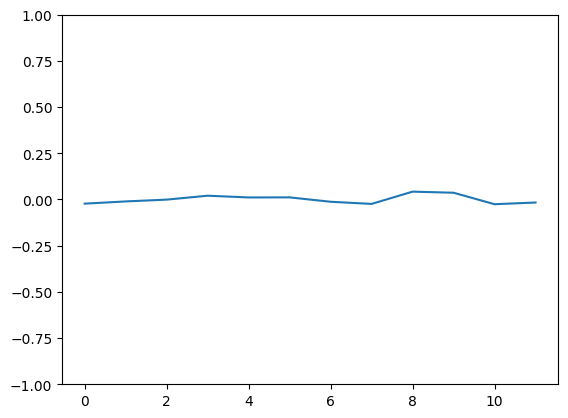

In [14]:
plt.ylim(-1, 1)

means = []
for i in range(x.shape[1]):
    means.append(np.mean(x_test[:,i]))

plt.plot(means, scaley=False)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
model.score(x_test, y_test)

0.8215

In [17]:
predictions = model.predict(x_test)

### Using RFECV

In [18]:
from sklearn.feature_selection import RFECV

model_2 = LogisticRegression()
rfecv = RFECV(model_2, step=1, min_features_to_select=6, n_jobs=-1)
rfecv.fit(x_train, y_train)

RFECV(estimator=LogisticRegression(), min_features_to_select=6, n_jobs=-1)

In [19]:
rfecv.support_

array([False,  True,  True, False,  True, False, False,  True, False,
        True,  True, False])

In [20]:
rfecv.ranking_

array([7, 1, 1, 4, 1, 3, 5, 1, 6, 1, 1, 2])

In [21]:
selected_features = np.where(rfecv.support_)[0]
x_train = x_train[:,selected_features]
x_test = x_test[:,selected_features]

model_2.fit(x_train, y_train)

LogisticRegression()

In [22]:
model_2.score(x_test, y_test)

0.824

### Using Grid Search View

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l2'],
    'C': [1.0, 2.0, 3.0],
    'max_iter': [100, 200, 300, 500],
    'solver': ['newton cg', 'lbfgs', 'sag', 'saga']
}

model_3 = LogisticRegression()
grid_search = GridSearchCV(model_3, param_grid)
grid_search.fit(x_train, y_train)

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0], 'max_iter': [100, 200, 300, 500],
                         'penalty': ['l2'],
                         'solver': ['newton cg', 'lbfgs', 'sag', 'saga']})

In [24]:
grid_search.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [25]:
grid_search.score(x_test, y_test)

0.824

### Using KFold

In [26]:
x = scaler.fit_transform(x)

In [27]:
rfecv.fit(x, y)

RFECV(estimator=LogisticRegression(), min_features_to_select=6, n_jobs=-1)

In [28]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)

test_scores = []
for train_idx, test_idx in k_fold.split(x):
    xi_train = x[train_idx]
    yi_train = y[train_idx]

    xi_test = x[test_idx]
    yi_test = y[test_idx]

    model_i = LogisticRegression()
    model_i.fit(xi_train, yi_train)

    test_scores.append(model_i.score(xi_test, yi_test))
    

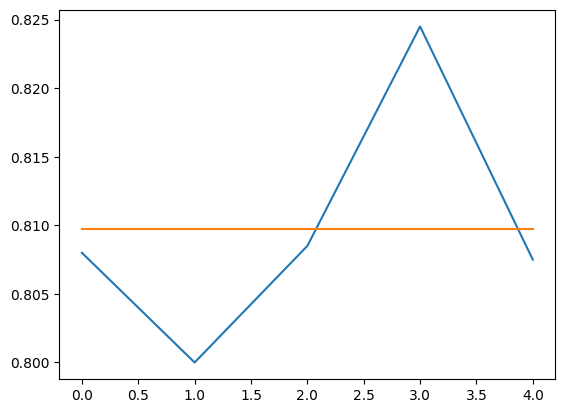

In [29]:
plt.plot(test_scores)
plt.plot([np.mean(test_scores)] * len(test_scores))
plt.show()

In [30]:
print('Cross Validation Score: ', np.mean(test_scores))

Cross Validation Score:  0.8097


In [34]:
predictions_2 = model_2.predict(x_test)

<Axes: >

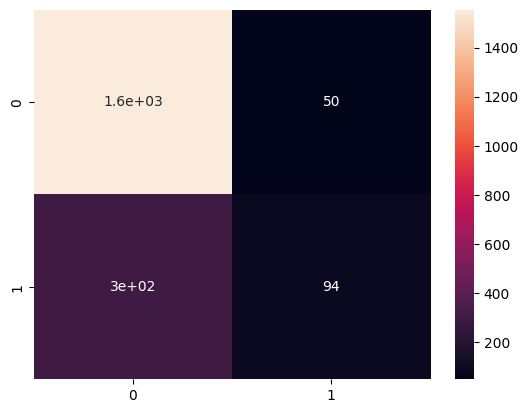

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

matrix = confusion_matrix(y_test, predictions_2)
sns.heatmap(matrix, annot=True)

In [37]:
precision_score(1, matrix), recall_score(1, matrix)

InvalidParameterError: The 'y_true' parameter of precision_score must be an array-like or a sparse matrix. Got 1 instead.

In [36]:
print(f'Accuracy Score: {accuracy_score(y_test, predictions_2)}')

Accuracy Score: 0.824
